<a href="https://colab.research.google.com/github/aswindcu2025/churn_prediction_telecom_ds/blob/main/data_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [14]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("blastchar/telco-customer-churn")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'telco-customer-churn' dataset.
Path to dataset files: /kaggle/input/telco-customer-churn


In [15]:
df = pd.read_csv(path + "/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [16]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [17]:

df.shape

(7043, 21)

## **Figuring out the missing values**



In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [19]:
df.isna()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7039,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7040,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7041,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [20]:
rows_with_na = df[df.isnull().any(axis=1)]
rows_with_na

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


Inference : There is no rows with missing values


## Converting the values to particular datatypes

In [21]:
df['ChurnFlag'] = (df['Churn'] == 'Yes').astype(int)

In [44]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')
df["gender"]  = df["gender"].astype('category')
df["SeniorCitizen"]  = df["SeniorCitizen"].astype('category')


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [24]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,ChurnFlag
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1


In [30]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,ChurnFlag
count,7043.000000,7043.000000,7043.000000,7032.000000,7043.000000
mean,0.162147,32.371149,64.761692,2283.300441,0.265370
std,0.368612,24.559481,30.090047,2266.771362,0.441561
min,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,9.000000,35.500000,401.450000,0.000000
50%,0.000000,29.000000,70.350000,1397.475000,0.000000
75%,0.000000,55.000000,89.850000,3794.737500,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000


## EDA

In [25]:
OverallChurn = float(df['ChurnFlag'].mean())
OverallChurn

0.2653698707936959

In [26]:
# Mean values by churn
filter = ["tenure", "MonthlyCharges", "TotalCharges", "SeniorCitizen"]
df.groupby("Churn")[filter].mean()

,tenure,MonthlyCharges,TotalCharges,SeniorCitizen
Churn,,,,
No,37.569965,61.265124,2555.344141,0.128721
Yes,17.979133,74.441332,1531.796094,0.254682


In [49]:
#

df.groupby("Churn")["gender"].value_counts()

Churn  gender
No     Male      2625
       Female    2549
Yes    Female     939
       Male       930
Name: count, dtype: int64

In [50]:
df.nunique()

,0
customerID,7043
gender,2
SeniorCitizen,2
Partner,2
Dependents,2
tenure,73
PhoneService,2
MultipleLines,3
InternetService,3
OnlineSecurity,3


/tmp/ipython-input-163131677.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df, palette="husl")


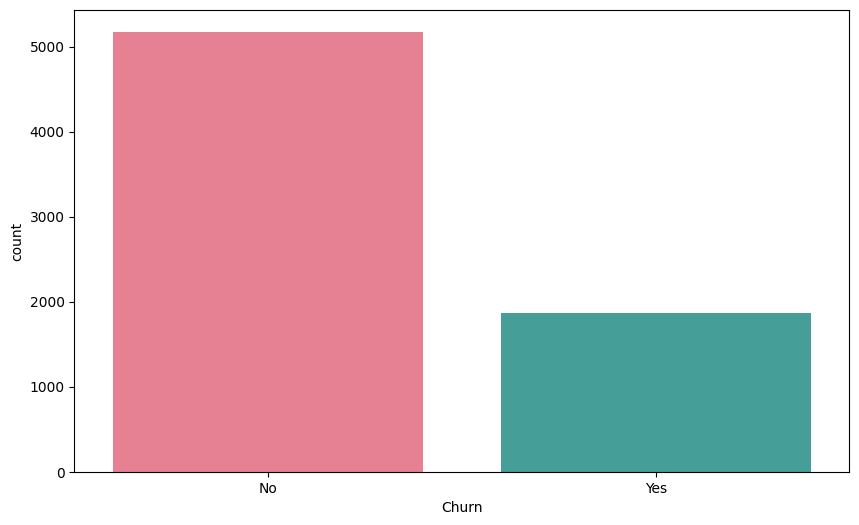

In [51]:
plt.figure(figsize=(10, 6))

sns.countplot(x='Churn', data=df, palette="husl")
plt.show()

In [52]:
cols_to_drop = ['customerID', 'Churn', 'ChurnFlag']
df_spare = df.drop(cols_to_drop, axis=1, inplace = False)
df_spare

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60


In [55]:
df_spare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            7043 non-null   category
 1   SeniorCitizen     7043 non-null   category
 2   Partner           7043 non-null   object  
 3   Dependents        7043 non-null   object  
 4   tenure            7043 non-null   int64   
 5   PhoneService      7043 non-null   object  
 6   MultipleLines     7043 non-null   object  
 7   InternetService   7043 non-null   object  
 8   OnlineSecurity    7043 non-null   object  
 9   OnlineBackup      7043 non-null   object  
 10  DeviceProtection  7043 non-null   object  
 11  TechSupport       7043 non-null   object  
 12  StreamingTV       7043 non-null   object  
 13  StreamingMovies   7043 non-null   object  
 14  Contract          7043 non-null   object  
 15  PaperlessBilling  7043 non-null   object  
 16  PaymentMethod     7043 n

In [56]:
categorical_cols = df_spare.select_dtypes(include=['object', 'category']).columns.tolist()
print("Categorical Columns:", categorical_cols)

Categorical Columns: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


/tmp/ipython-input-1429206430.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate = df.groupby(i)['ChurnFlag'].mean().reset_index()
/tmp/ipython-input-1429206430.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=i, y = "Churn Rate", data=churn_rate, palette = "viridis")


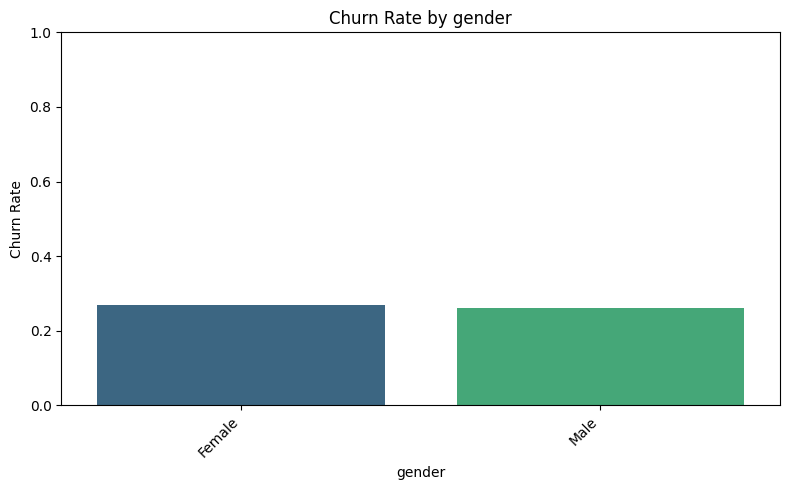

/tmp/ipython-input-1429206430.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate = df.groupby(i)['ChurnFlag'].mean().reset_index()
/tmp/ipython-input-1429206430.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=i, y = "Churn Rate", data=churn_rate, palette = "viridis")



Churn rates for gender:
gender  Churn Rate
Female    0.269209
  Male    0.261603



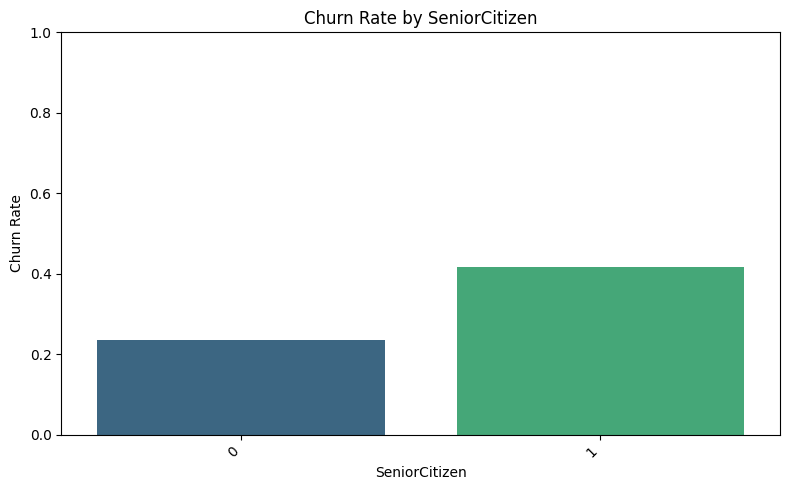


Churn rates for SeniorCitizen:
SeniorCitizen  Churn Rate
            0    0.236062
            1    0.416813



/tmp/ipython-input-1429206430.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=i, y = "Churn Rate", data=churn_rate, palette = "viridis")


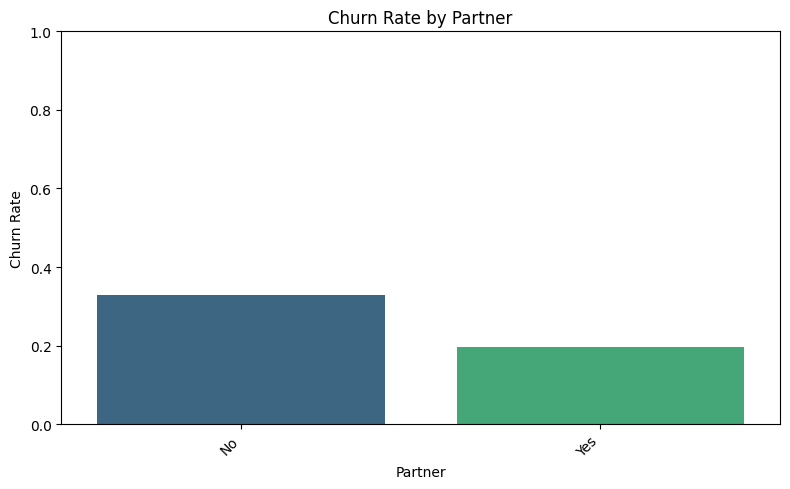


Churn rates for Partner:
Partner  Churn Rate
     No    0.329580
    Yes    0.196649



/tmp/ipython-input-1429206430.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=i, y = "Churn Rate", data=churn_rate, palette = "viridis")


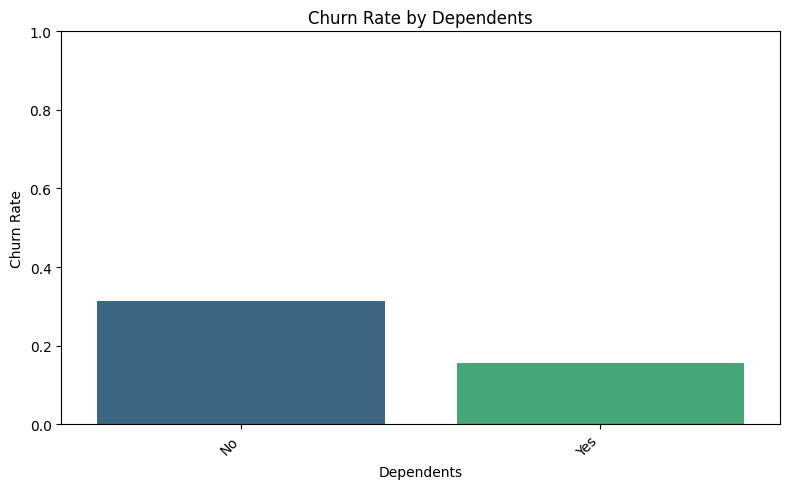


Churn rates for Dependents:
Dependents  Churn Rate
        No    0.312791
       Yes    0.154502



/tmp/ipython-input-1429206430.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=i, y = "Churn Rate", data=churn_rate, palette = "viridis")


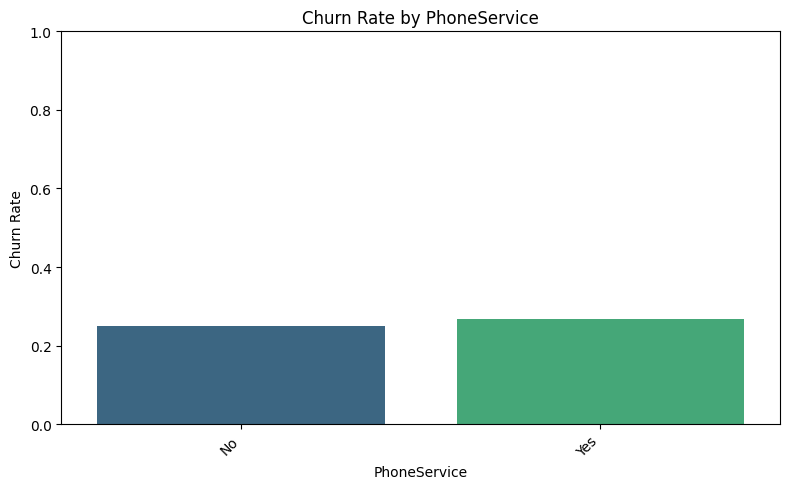


Churn rates for PhoneService:
PhoneService  Churn Rate
          No    0.249267
         Yes    0.267096



/tmp/ipython-input-1429206430.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=i, y = "Churn Rate", data=churn_rate, palette = "viridis")


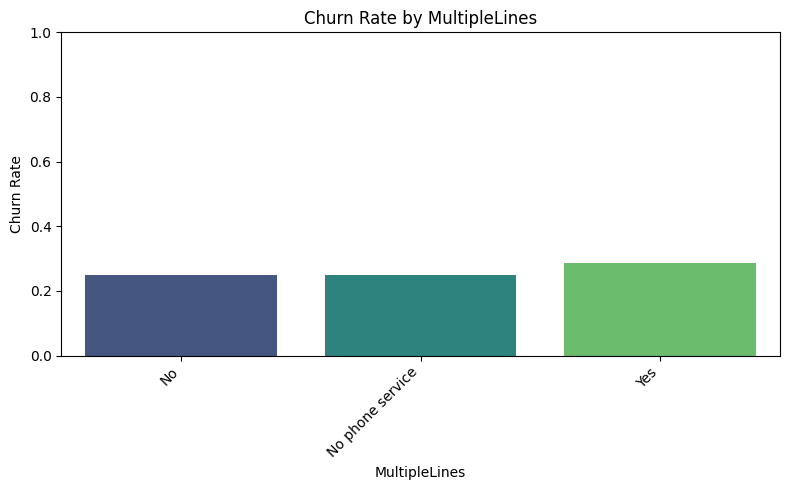


Churn rates for MultipleLines:
   MultipleLines  Churn Rate
              No    0.250442
No phone service    0.249267
             Yes    0.286099



/tmp/ipython-input-1429206430.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=i, y = "Churn Rate", data=churn_rate, palette = "viridis")


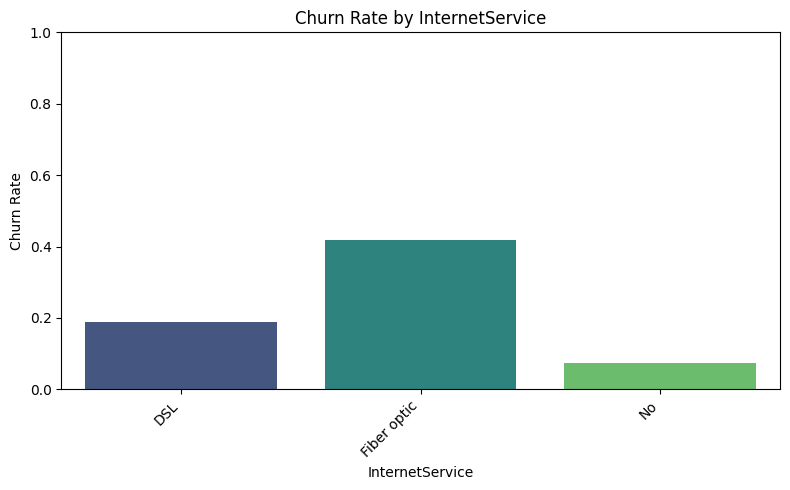


Churn rates for InternetService:
InternetService  Churn Rate
            DSL    0.189591
    Fiber optic    0.418928
             No    0.074050



/tmp/ipython-input-1429206430.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=i, y = "Churn Rate", data=churn_rate, palette = "viridis")


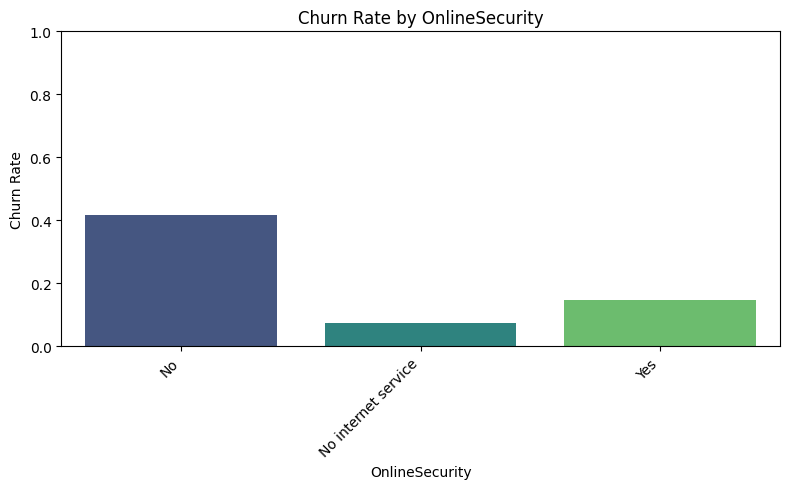


Churn rates for OnlineSecurity:
     OnlineSecurity  Churn Rate
                 No    0.417667
No internet service    0.074050
                Yes    0.146112



/tmp/ipython-input-1429206430.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=i, y = "Churn Rate", data=churn_rate, palette = "viridis")


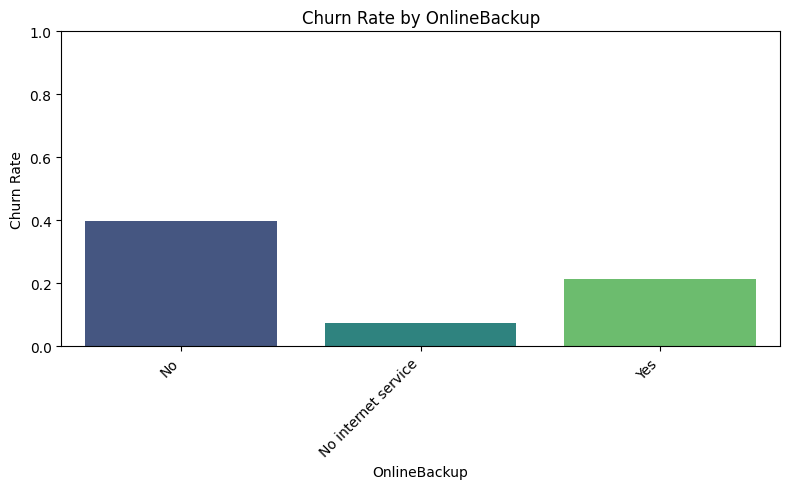


Churn rates for OnlineBackup:
       OnlineBackup  Churn Rate
                 No    0.399288
No internet service    0.074050
                Yes    0.215315



/tmp/ipython-input-1429206430.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=i, y = "Churn Rate", data=churn_rate, palette = "viridis")


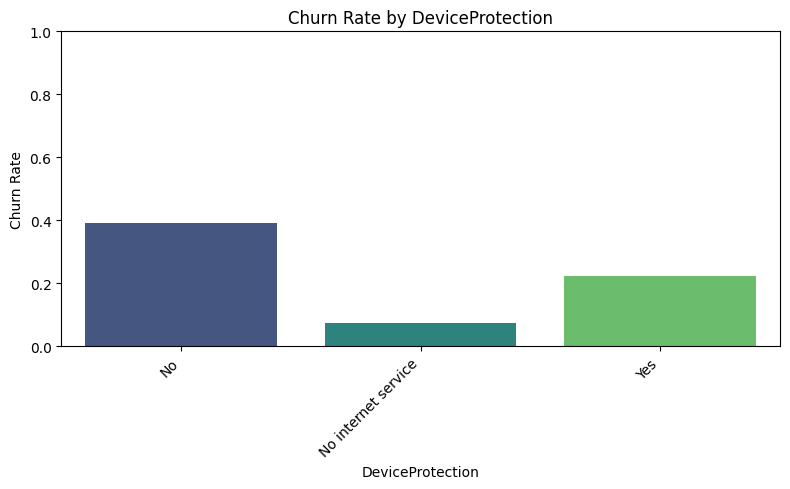


Churn rates for DeviceProtection:
   DeviceProtection  Churn Rate
                 No    0.391276
No internet service    0.074050
                Yes    0.225021



/tmp/ipython-input-1429206430.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=i, y = "Churn Rate", data=churn_rate, palette = "viridis")


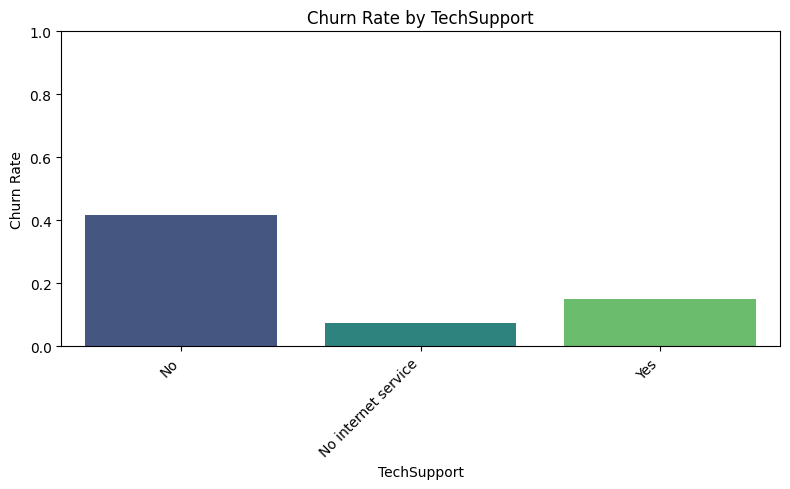


Churn rates for TechSupport:
        TechSupport  Churn Rate
                 No    0.416355
No internet service    0.074050
                Yes    0.151663



/tmp/ipython-input-1429206430.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=i, y = "Churn Rate", data=churn_rate, palette = "viridis")


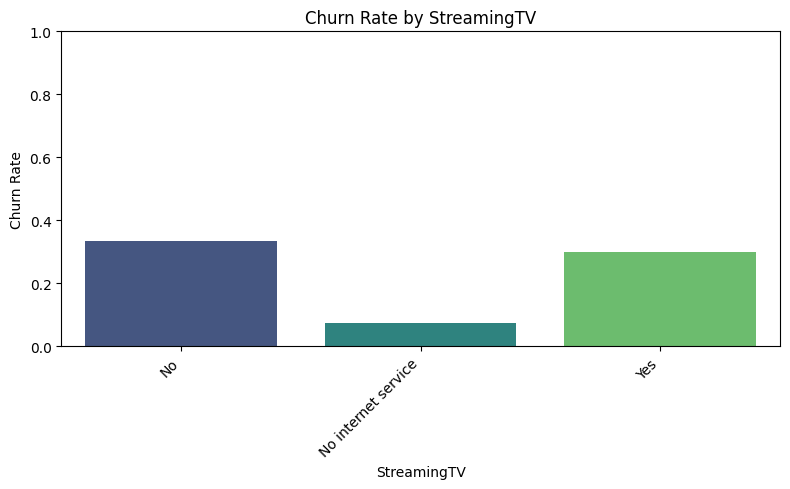

/tmp/ipython-input-1429206430.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=i, y = "Churn Rate", data=churn_rate, palette = "viridis")



Churn rates for StreamingTV:
        StreamingTV  Churn Rate
                 No    0.335231
No internet service    0.074050
                Yes    0.300702



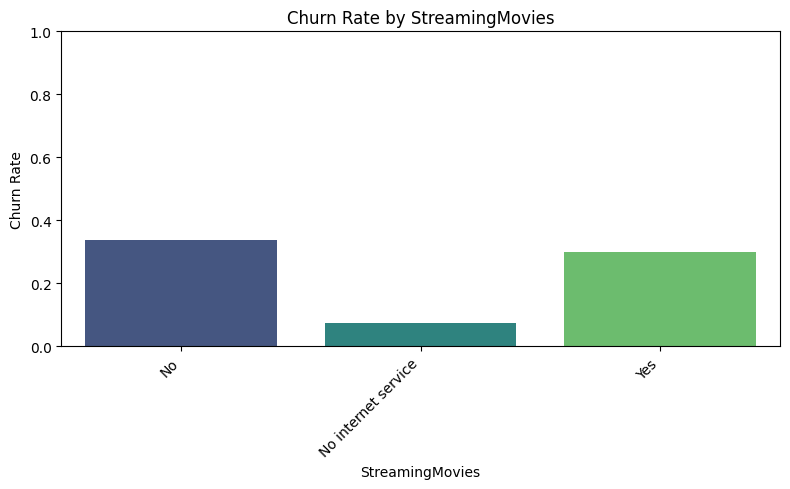


Churn rates for StreamingMovies:
    StreamingMovies  Churn Rate
                 No    0.336804
No internet service    0.074050
                Yes    0.299414



/tmp/ipython-input-1429206430.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=i, y = "Churn Rate", data=churn_rate, palette = "viridis")


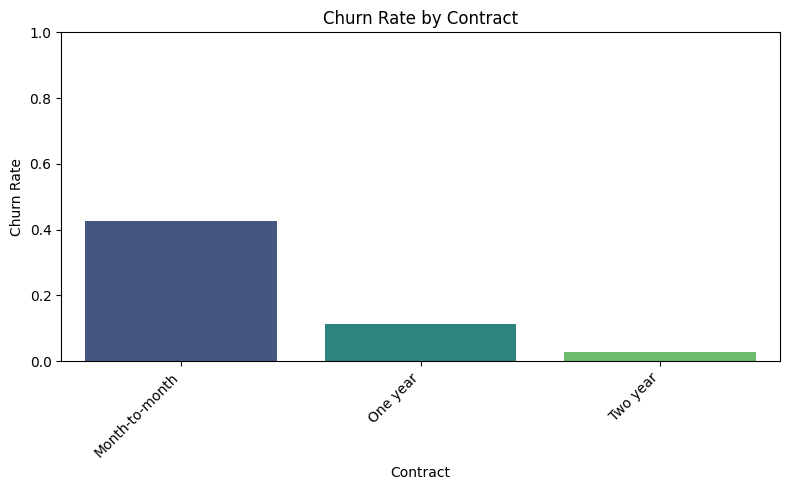


Churn rates for Contract:
      Contract  Churn Rate
Month-to-month    0.427097
      One year    0.112695
      Two year    0.028319



/tmp/ipython-input-1429206430.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=i, y = "Churn Rate", data=churn_rate, palette = "viridis")


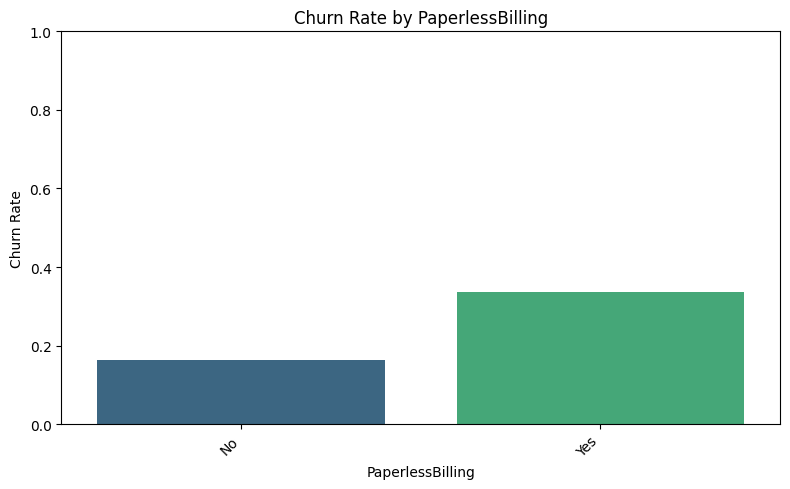


Churn rates for PaperlessBilling:
PaperlessBilling  Churn Rate
              No    0.163301
             Yes    0.335651



/tmp/ipython-input-1429206430.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=i, y = "Churn Rate", data=churn_rate, palette = "viridis")


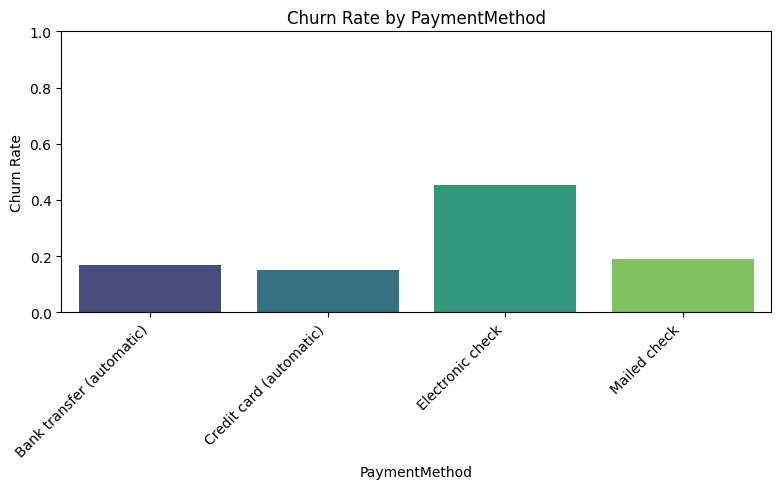


Churn rates for PaymentMethod:
            PaymentMethod  Churn Rate
Bank transfer (automatic)    0.167098
  Credit card (automatic)    0.152431
         Electronic check    0.452854
             Mailed check    0.191067



In [74]:
for i in categorical_cols:
     churn_rate = df.groupby(i)['ChurnFlag'].mean().reset_index()
     churn_rate = churn_rate.rename(columns={'ChurnFlag': 'Churn Rate'})

    #  print(churn_rate,"\n")
     plt.figure(figsize=(8, 5))
     sns.barplot(x=i, y = "Churn Rate", data=churn_rate, palette = "viridis")
     plt.title(f'Churn Rate by {i}')
     plt.xlabel(i)
     plt.ylabel('Churn Rate')
     plt.ylim(0,1)
     plt.xticks(rotation=45, ha='right')
     plt.tight_layout()
     plt.show()
     print(f"\nChurn rates for {i}:\n{churn_rate.to_string(index=False)}\n")

